In [1]:
# ! pip install wordcloud
# ! pip install textblob
# ! python -m textblob.download_corpora
# import nltk
# nltk.download('stopwords')

In [378]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
from textblob import Word

In [379]:
df = pd.read_excel("CSE Course Work.csv", usecols="A:C")
print(df.columns)

Index(['Course Code', 'Course Name ', 'Description '], dtype='object')


In [380]:
## Lower case

def lower_case(df):
    df = df.dropna()
    df['Description '] = df['Description '].apply(lambda x: " ".join(x.lower()for x in x.split()))
    ## remove tabulation and punctuation
    df['Description '] = df['Description '].str.replace('[^\w\s]',' ')
    ## digits
    df['Description '] = df['Description '].str.replace('\d+', '')

    #remove stop words
    stop = stopwords.words('english')
    df['Description '] = df['Description '].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    ## lemmatization
    df['Description '] = df['Description '].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    return df

In [381]:
def otherStopWordsDeletion(df):
    other_stop_words = ['junior', 'senior','experience','etc','job','work','company','technique',
                        'candidate','skill','skills','language','menu','inc','new','plus','years',
                       'technology','organization','ceo','cto','account','manager','data','scientist','mobile',
                        'developer','product','revenue','strong']

    df['Description '] = df['Description '].apply(lambda x: " ".join(x for x in x.split() if x not in other_stop_words))
    return df


*** CSE 101 ***



<ipython-input-380-b6da92638c8a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description '] = df['Description '].str.replace('[^\w\s]',' ')
<ipython-input-380-b6da92638c8a>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description '] = df['Description '].str.replace('\d+', '')


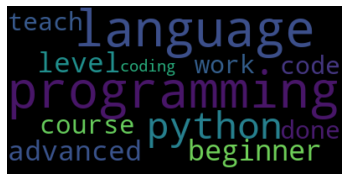


*** CSE 114 ***



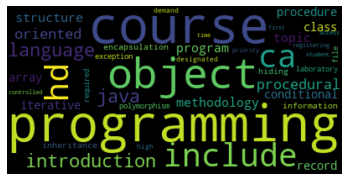


*** CSE 214 ***



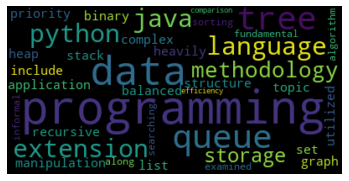


*** CSE 215 ***



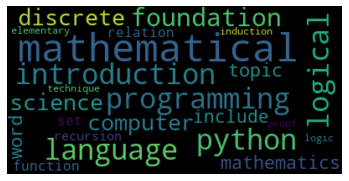


*** CSE 216 ***



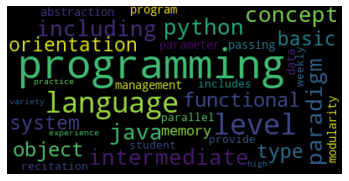


*** CSE 220 ***



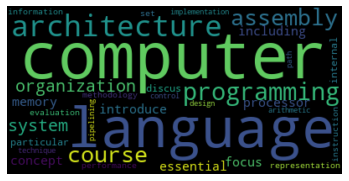


*** CSE 300 ***



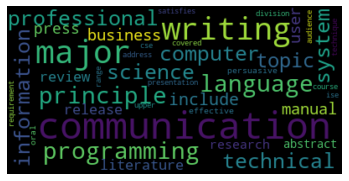


*** CSE 301 ***



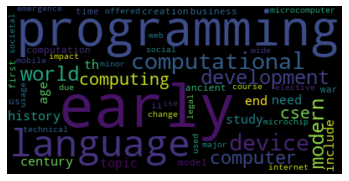


*** CSE 303 ***



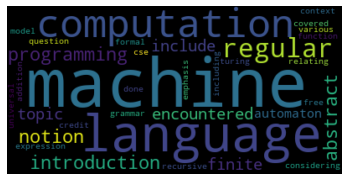


*** CSE 304 ***



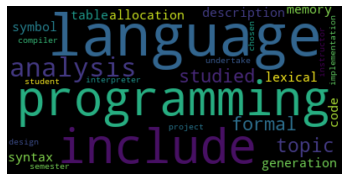


*** CSE 306 ***



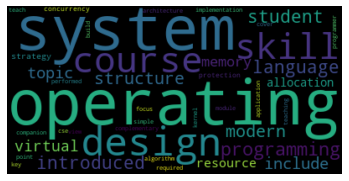


*** CSE 307 ***



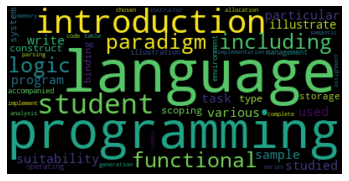


*** CSE 310 ***



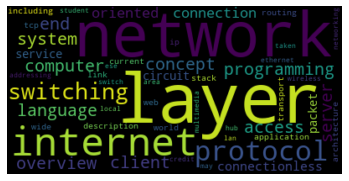


*** CSE 311 ***



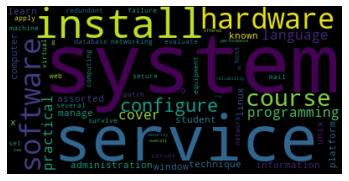


*** CSE 312 ***



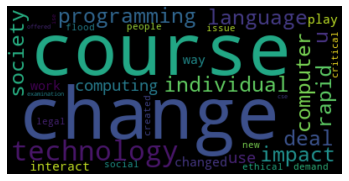


*** CSE 316 ***



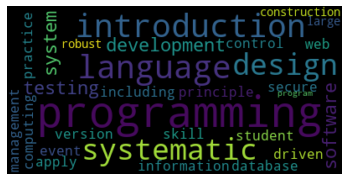


*** CSE 320 ***



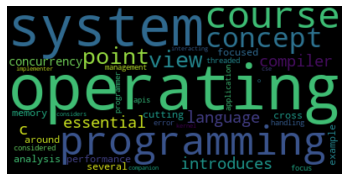


*** CSE 323 ***



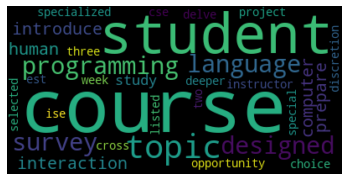


*** CSE 325 ***



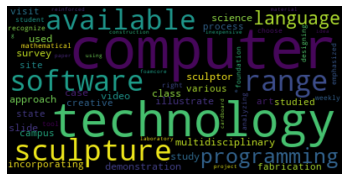


*** CSE 327 ***



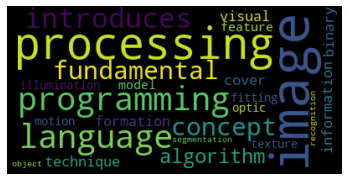


*** CSE 328 ***



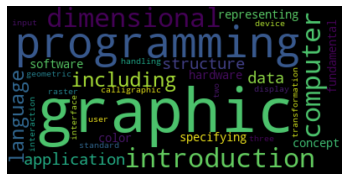


*** CSE 331 ***



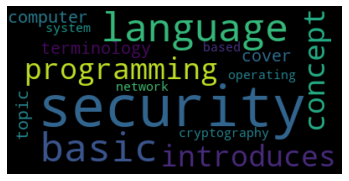


*** CSE 332 ***



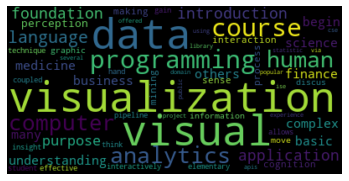


*** CSE 333 ***



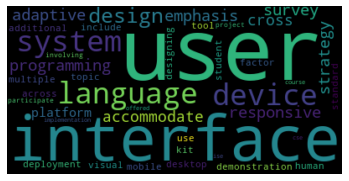


*** CSE 334 ***



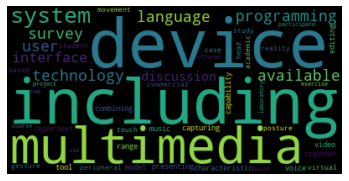


*** CSE 336 ***



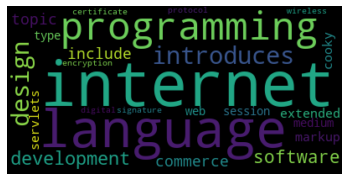


*** CSE 337 ***



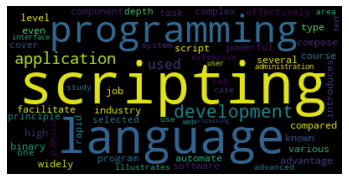


*** CSE 351 ***



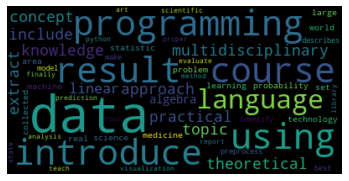


*** CSE 352 ***



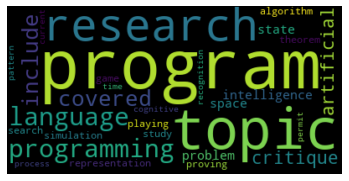


*** CSE 353 ***



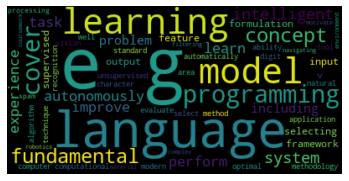


*** CSE 354 ***



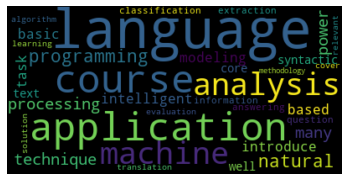


*** CSE 355 ***



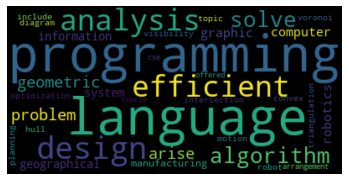


*** CSE 356 ***



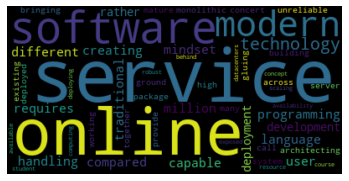


*** CSE 357 ***



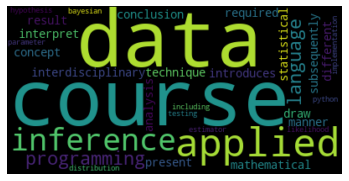


*** CSE 360 ***



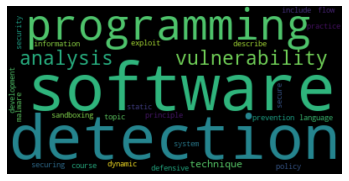


*** CSE 361 ***



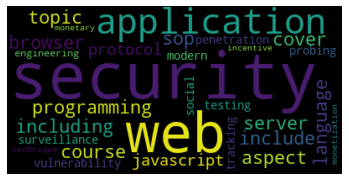


*** CSE 362  ***



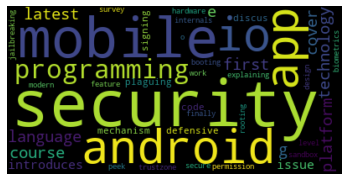


*** CSE 363 ***



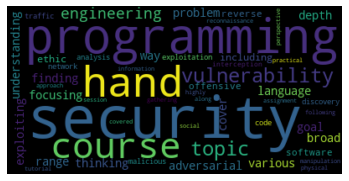


*** CSE 364 ***



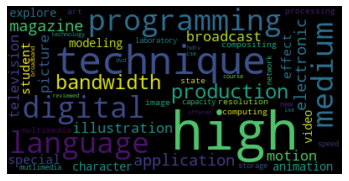


*** CSE 366 ***



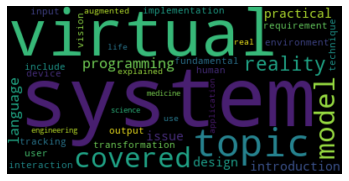


*** CSE 370 ***



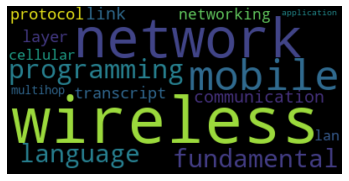


*** CSE 371 ***



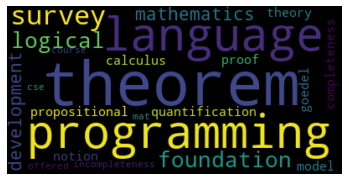


*** CSE 373 ***



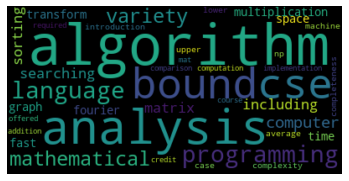


*** CSE 376 ***



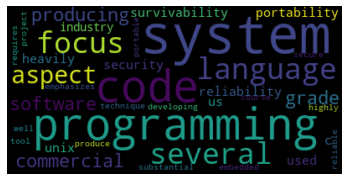


*** CSE 377 ***



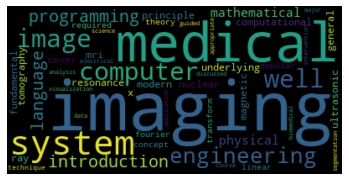


*** CSE 378 ***



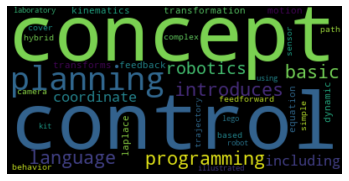


*** CSE 380 ***



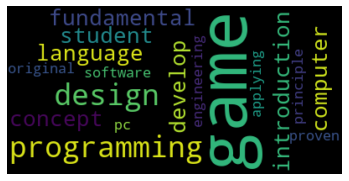


*** CSE 381 ***



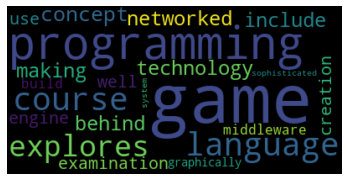


*** CSE 416 ***



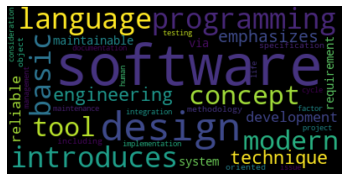

In [382]:
## cda stands for course description aggregated
df = lower_case(df)
cda = df.groupby(['Course Code']).sum().reset_index()
course_list = cda['Course Code'].unique().tolist()
for course in course_list:

    # Start with one review:
    text = cda[cda['Course Code'] == course].iloc[0]['Description ']
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    print("\n***",course,"***\n")
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [383]:
df = otherStopWordsDeletion(df)

In [384]:
## Converting text to features 
vectorizer = TfidfVectorizer()
#Tokenize and build vocabulary
X = vectorizer.fit_transform(df['Description '])
y = df['Course Code']

# split data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=109) 
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)

# Fit model
clf = MultinomialNB()
clf.fit(X_train, y_train)
## Predict
y_predicted = clf.predict(X_test)

train data shape:  (44, 841)
test data shape:  (5, 841)


In [385]:
from textblob import TextBlob
technical_skills = ['python', 'c','r', 'c++','java','hadoop','scala','flask','pandas','spark','scikit-learn',
                    'numpy','php','sql','mysql','css','mongdb','nltk','fastai' , 'keras', 'pytorch','tensorflow',
                   'linux','Ruby','JavaScript','django','react','reactjs','ai','ui','tableau']
feature_array = vectorizer.get_feature_names()
# number of overall model features
features_numbers = len(feature_array)
## max sorted features number
n_max = int(features_numbers * 0.1)

##initialize output dataframe
output = pd.DataFrame()
for i in range(0,len(clf.classes_)):
    class_prob_indices_sorted = clf.feature_log_prob_[i, :].argsort()[::-1]
    raw_skills = np.take(feature_array, class_prob_indices_sorted[:n_max])
    top_technical_skills= list(set(technical_skills).intersection(raw_skills))
    txt = " ".join(raw_skills)
    blob = TextBlob(txt)
#     top_adjectives = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("JJ")][:10]
    top_verb_gerunds = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("VBG")][:10]
    top_nouns = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("NN")][:10]

    top_skills = top_verb_gerunds + top_nouns
    output = output.append({'course_title':clf.classes_[i],
                        'skills':top_skills },
                       ignore_index=True)

In [386]:
output

,course_title,skills
0,CSE 101,"[coding, programming, writing, exploiting, exp..."
1,CSE 114,"[registering, hiding, programming, exploiting,..."
2,CSE 214,"[programming, searching, sorting, exploiting, ..."
3,CSE 215,"[programming, filtering, exploiting, explainin..."
4,CSE 216,"[programming, passing, including, existing, ex..."
5,CSE 220,"[pipelining, including, programming, exploitin..."
6,CSE 300,"[writing, programming, existing, explaining, f..."
7,CSE 301,"[computing, programming, exploiting, explainin..."
8,CSE 303,"[considering, relating, turing, including, exp..."
9,CSE 304,"[programming, existing, explaining, exploiting..."


### Let's do the same thing with the job descriptions and get the skillsets for them : Nouns, Verb Gerunds, Adjectives

In [387]:
df2 = pd.read_csv("job_skills.csv")
df2.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [388]:
df2['Category'].unique()

array(['Program Management', 'Manufacturing & Supply Chain',
       'Technical Solutions', 'Developer Relations',
       'Hardware Engineering', 'Partnerships',
       'Product & Customer Support', 'Software Engineering',
       'Data Center & Network', 'Business Strategy', 'Technical Writing',
       'Technical Infrastructure', 'IT & Data Management',
       'Marketing & Communications', 'Network Engineering',
       'Sales & Account Management', 'Sales Operations', 'Finance',
       'Legal & Government Relations', 'Administrative',
       'User Experience & Design', 'People Operations',
       'Real Estate & Workplace Services'], dtype=object)

In [389]:
df_jobs = pd.DataFrame()
df_jobs['Title'] = df2['Title']
df_jobs['Description '] = df2["Preferred Qualifications"]

In [390]:
## cda stands for course description aggregated
df = lower_case(df_jobs)
jda = df.groupby(['Title']).sum().reset_index()
job_list = jda['Title'].unique().tolist()
for job in job_list:

    # Start with one review:
    text = jda[jda['Title'] == job].iloc[0]['Description ']
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.show()

<ipython-input-380-b6da92638c8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description '] = df['Description '].apply(lambda x: " ".join(x.lower()for x in x.split()))
<ipython-input-380-b6da92638c8a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description '] = df['Description '].str.replace('[^\w\s]',' ')
<ipython-input-380-b6da92638c8a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description '] = df['Description '].str.replace('[

In [391]:
df = otherStopWordsDeletion(df)
df.head()

<ipython-input-381-4b9016ea4476>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description '] = df['Description '].apply(lambda x: " ".join(x for x in x.split() if x not in other_stop_words))


,Title,Description
0,Google Cloud Program Manager,business market program saas cloud computing e...
1,"Supplier Development Engineer (SDE), Cable/Con...",bsee bsme bsie degree using statistic tool ana...
2,"Data Analyst, Product and Tools Operations, Go...",partnering consulting cross functionally stake...
3,"Developer Advocate, Partner Engineering",software architect advocate consultant working...
4,"Program Manager, Audio Visual (AV) Deployments",ct certification construction sector project m...


In [392]:
## Converting text to features 
vectorizer = TfidfVectorizer()
#Tokenize and build vocabulary
X = vectorizer.fit_transform(df['Description '])
y = df['Title']

# split data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=109) 
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)

# Fit model
clf = MultinomialNB()
clf.fit(X_train, y_train)
## Predict
y_predicted = clf.predict(X_test)

train data shape:  (1112, 2759)
test data shape:  (124, 2759)


In [393]:
from textblob import TextBlob
technical_skills = ['python', 'c','r', 'c++','java','hadoop','scala','flask','pandas','spark','scikit-learn',
                    'numpy','php','sql','mysql','css','mongdb','nltk','fastai' , 'keras', 'pytorch','tensorflow',
                   'linux','Ruby','JavaScript','django','react','reactjs','ai','ui','tableau']
feature_array = vectorizer.get_feature_names()
# number of overall model features
features_numbers = len(feature_array)
## max sorted features number
n_max = int(features_numbers * 0.1)

##initialize output dataframe
output2 = pd.DataFrame()
for i in range(0,len(clf.classes_)):
    class_prob_indices_sorted = clf.feature_log_prob_[i, :].argsort()[::-1]
    raw_skills = np.take(feature_array, class_prob_indices_sorted[:n_max])
    top_technical_skills= list(set(technical_skills).intersection(raw_skills))
    txt = " ".join(raw_skills)
    blob = TextBlob(txt)
#     top_adjectives = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("JJ")][:10]
    top_verb_gerunds = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("VBG")][:10]
    top_nouns = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("NN")][:10]

    top_skills = top_verb_gerunds + top_nouns
    output2 = output2.append({'job_title':clf.classes_[i],
                        'technical_skills':top_technical_skills,
                        'soft_skills':top_skills },
                       ignore_index=True)

In [394]:
#build a similarity function
#this function gives top 10 job matches for your course
import collections

def findSimilarity(course_skills, all_jobs_skills, course_name, jobs_names):
    course_to_job_correlation = []
    for i in range(len(all_jobs_skills)):
        for skill1 in all_jobs_skills[i]:
            temp = []
            for skill2 in course_skills:
                try:
                    cosine_similarity = wv.similarity(skill1, skill2)
                    temp.append(cosine_similarity) 
                except:
                    continue
        if len(temp)>0:
            average_similarity = sum(temp)/len(temp)
            course_to_job_correlation.append([jobs_names[i], course_name, average_similarity])
    return(course_to_job_correlation)

In [395]:
course_skills = output["skills"]
job_skills = output2["soft_skills"]
job_names = output2["job_title"]
course_titles = output["course_title"]

In [396]:
similarities_CJ = []
for skillset, course_name in zip(course_skills, course_titles):
    similarities_CJ.append(findSimilarity(skillset, job_skills, course_name, job_names))

In [397]:
temp = []
for similarity in similarities_CJ:
    currList = sorted(similarity, key = lambda x:-x[2])
    curr_df = pd.DataFrame(currList,columns=['Domain','Course','Similarity'])
    temp.append(curr_df)

In [403]:
final_sol = pd.concat(temp).reset_index()

In [404]:
del final_sol['index']
final_sol.to_csv("finalMapping.csv")

In [405]:
mappingDB = pd.read_csv("finalMapping.csv")
mappingDB.head()

,Unnamed: 0,Domain,Course,Similarity
0,0,Data Scientist / Quantitative Analyst Technica...,CSE 101,0.177092
1,1,People Partner,CSE 101,0.169780
2,2,"Marketing Analyst, Product Growth",CSE 101,0.161820
3,3,Consumer Insights Manager,CSE 101,0.159648
4,4,"Software Engineer, Accessibility",CSE 101,0.157189


In [408]:
mappingDB.shape

(31240, 4)

In [418]:
job_skills_dict = {}
for job, soft_skills in zip(output2['job_title'], output2["soft_skills"]):
    job_skills_dict[job] = soft_skills
    
course_skills_dict = {}
for course, course_skills in zip(output['course_title'], output["skills"]):
    course_skills_dict[course] = course_skills

In [435]:
job_skills = []
course_skills = []

for job, course in zip(mappingDB["Domain"], mappingDB["Course"]):
    course_skills.append(",".join(course_skills_dict[course]))
    job_skills.append(','.join(job_skills_dict[job]))

mappingDB["jobSkills"] = job_skills
mappingDB["courseSkills"] = course_skills

In [436]:
#now lets just append top 10 matching jobs to the df

In [453]:
cols = mappingDB.columns
fin_db = pd.DataFrame(columns = cols)
for i in range(0, 31240, 710):
    fin_db = fin_db.append(mappingDB.iloc[i:i+10])
del fin_db["Unnamed: 0"]
fin_db = fin_db.reset_index()
del fin_db["index"]

In [456]:
fin_db.to_csv("courses_skills_job_data.csv")

In [ ]:
# ! pip install gensim

In [ ]:
# from gensim.models import Word2Vec, KeyedVectors
# import gensim

In [ ]:
# import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')
# vec_king = wv['king']